Name - Y.H.A.Epa

Index Number - 190166V

GitHub Link - https://github.com/Yasara-Hasini/EN2550_Exercises

Question 01

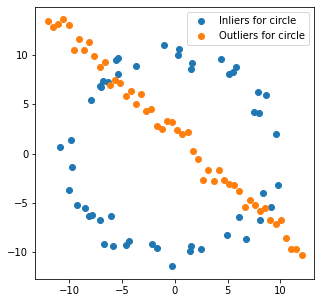

In [34]:
#Question 1
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(x,y, label=r"Inliers for circle")

X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ, X_line))
ax.scatter(x,y, label = "Outliers for circle"), ax.legend()
plt.show()

total points =  50
N =  35


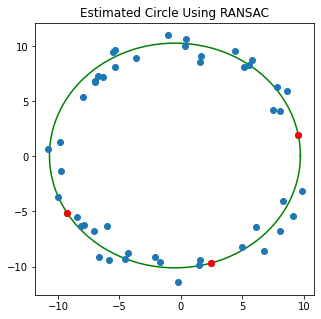

In [40]:
#Part (a)
total_points = len(x)
print("total points = ", total_points)
p, s, e = 0.99, 3, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
print("N = ", N)

def finding_circle(x1, y1, x2, y2, x3, y3):
    A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    B = (x1**2 + y1**2)*(y2-y3) + (x2**2 + y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)  
    C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
    D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2 + y3**2)*(x2*y1-x1*y2)
    H, K, R = B/(2*A), -C/(2*A), np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
    return [H,K,R]

def drawing_circle(x0,y0,r,px,py):
    angle = np.linspace(0, 2*np.pi, 360)
    x_x, y_y = x0 + r*np.cos(angle), y0 + r*np.sin(angle)
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.plot(x_x, y_y, color = "green"), ax.plot(x, y, "o"), ax.plot(px, py, "o", color = "red"), ax.set_title("Estimated Circle Using RANSAC")
    plt.show()

def num_generator(n):
    p_1, p_2, p_3 = np.random.randint(n, size=3)
    if p_1==p_2 or p_2==p_3 or p_1==p_3:
        return num_generator(n)
    else:
        return p_1, p_2, p_3

def distance(h, k, r, x, y):
    return (np.abs(np.sqrt((x-h)**2+(y-k)**2)-r))

x, y = X[:50,0], X[:50,1]
ransac = []
max_inliers = 0
inlier_set = []
for i in range(total_points):
    p1, p2, p3 = num_generator(total_points)
    inliers = 0
    x0, y0, radius = finding_circle(x[p1], y[p1], x[p2], y[p2], x[p3], y[p3])
    inlier_set = []
    for j in range(total_points):
        d = distance(x0, y0, radius,x[j],y[j])
        if d<1:
            inliers += 1
            inlier_set.append([x[j], y[j]])

    outliers = total_points - inliers
    if inliers > max_inliers:
        ransac = [p1, p2, p3]
        max_inliers = inliers
        ransac_center_x, ransac_center_y, ransac_radius = x0, y0, radius
        ransac_set = inlier_set

drawing_circle(ransac_center_x, ransac_center_y, ransac_radius,[x[ransac[0]], x[ransac[1]], x[ransac[2]]], [y[ransac[0]], y[ransac[1]], y[ransac[2]]])

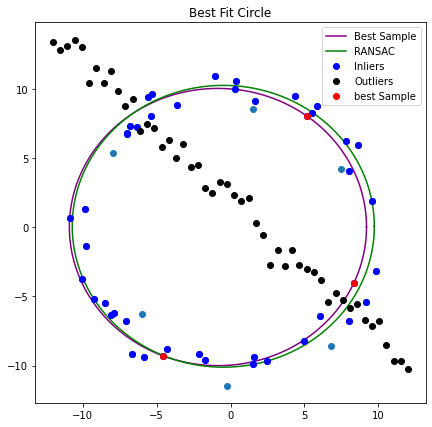

In [45]:
#Part (b)
ransac_x, ransac_y = [], []
for i in ransac_set:
    ransac_x.append(i[0])
    ransac_y.append(i[1])

total_points = len(ransac_set)
best = []
max_inliers = 0

for i in range(N):
    po1, po2, po3 = num_generator(total_points)
    inliers = 0
    center_x_coord, center_y_coord, rad = finding_circle(ransac_x[po1], ransac_y[po1], ransac_x[po2], ransac_y[po2], ransac_x[po3], ransac_y[po3])

    for j in range(total_points):
        d = distance(center_x_coord, center_y_coord, rad, ransac_x[j], ransac_y[j])
        if d<1:
            inliers += 1
    if inliers > max_inliers:
        best = [po1, po2, po3]
        max_inliers = inliers
        best_center_x, best_center_y, best_radius = center_x_coord, center_y_coord, rad

angle = np.linspace(0, 2*np.pi, 360)
x_x, y_y = best_center_x + best_radius*np.cos(angle), best_center_y + best_radius*np.sin(angle)
r_x, r_y = ransac_center_x + ransac_radius*np.cos(angle), ransac_center_y + ransac_radius*np.sin(angle)

fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.plot(x_x, y_y, color = "purple", label = "Best Sample"), ax.plot(r_x, r_y, color = "green", label = "RANSAC"), ax.plot(x, y, "o")
ax.plot(ransac_x, ransac_y, "o", color = "blue", label = "Inliers"), ax.plot(X[50:,0], X[50:,1], "o", color = "black", label = "Outliers"), ax.plot([ransac_x[best[0]], ransac_x[best[1]], ransac_x[best[2]]], [ransac_y[best[0]], ransac_y[best[1]], ransac_y[best[2]]], "o", color = "red", label = "best Sample")
ax.legend(), ax.set_title("Best Fit Circle")
plt.show()

* RANSAC Algorithm uses following parameters to get the correct circle estimation.

1) s = 3             --> Since we are estimating a circle, we need minimum of 3 different random points. Thus s has been taken as 3.
2) total points = 50 --> There are 100 total set of points; 50 of them are inliers and other 50 are outliers. To get a most accurate  circle, we need to get all these inliers. So, the consensus set size (total points) is equal to 50.
3) N = 35            --> According to $log(1-p)/log(1-(1-e)^s)$ equation, when there is a 0.5 of outlier ratio and 0.99 probability at least one random sample is free from outliers, we have to choose N as 35.

          

Question 02

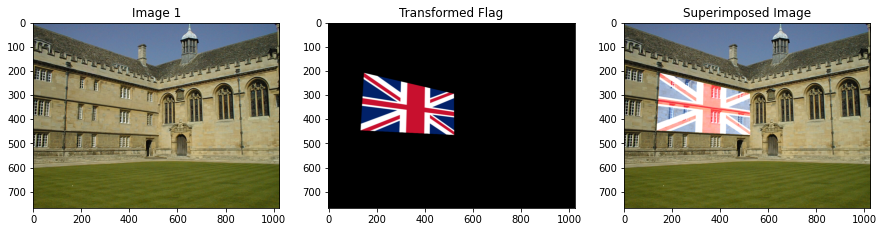

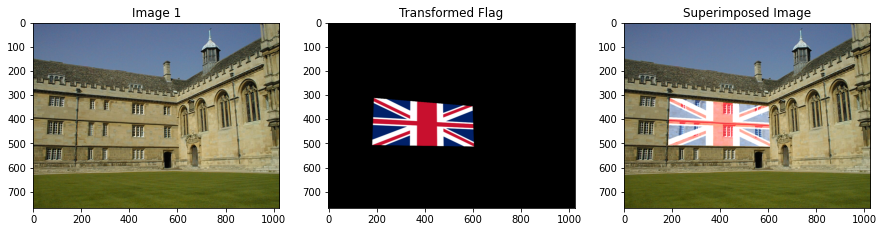

In [54]:
#Question 2
corners = []
def mouse_click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x,y])

ims = ["001.jpg", "003.jpg"]
for i in range(2):
    im = cv.imread(ims[i])
    cv.imshow("Wadham College", im)
    corners = []
    cv.setMouseCallback("Wadham College", mouse_click), cv.waitKey(0), cv.destroyAllWindows()

    h, w = np.shape(im)[0], np.shape(im)[1]
    zero_matrix = np.array([[0], [0], [0]])

    x1, y1, x2, y2, x3, y3, x4, y4 = corners[0][0], corners[0][1], corners[1][0], corners[1][1], corners[2][0], corners[2][1], corners[3][0], corners[3][1]

    flag_im = cv.imread("Flag_of_the_United_Kingdom.svg.png")
    fh, fw = np.shape(flag_im)[0], np.shape(flag_im)[1]
    f1, f2, f3, f4 = np.array([[0, 0, 1]]), np.array([[fw-1, 0, 1]]), np.array([[fw-1, fh-1, 1]]), np.array([[0, fh-1, 1]])

    matrix_A = np.concatenate((np.concatenate((zero_matrix.T,f1, -y1*f1), axis = 1), np.concatenate((f1, zero_matrix.T, -x1*f1), axis = 1),
                                np.concatenate((zero_matrix.T,f2, -y2*f2), axis = 1), np.concatenate((f2, zero_matrix.T, -x2*f2), axis = 1),
                                np.concatenate((zero_matrix.T,f3, -y3*f3), axis = 1), np.concatenate((f3, zero_matrix.T, -x3*f3), axis = 1),
                                np.concatenate((zero_matrix.T,f4, -y4*f4), axis = 1), np.concatenate((f4, zero_matrix.T, -x4*f4), axis = 1)), axis = 0, dtype=np.float64)

    W, v = np.linalg.eig(((matrix_A.T)@matrix_A))
    temph= v[:,np.argmin(W)]
    H = temph.reshape((3,3))
    transformed_flag = cv.warpPerspective(flag_im, H, (w, h))
    final = cv.add(transformed_flag, im)
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB)), ax[0].set_title("Image 1")
    ax[1].imshow(cv.cvtColor(transformed_flag,cv.COLOR_BGR2RGB)), ax[1].set_title("Transformed Flag")
    ax[2].imshow(cv.cvtColor(final,cv.COLOR_BGR2RGB)), ax[2].set_title("Superimposed Image")
    plt.show()

Question 03

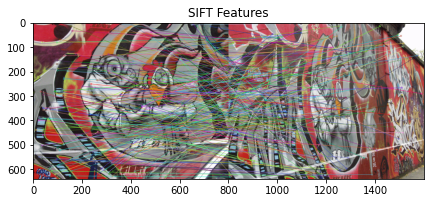

In [49]:
#Question 3 (a)
import cv2 as cv
import matplotlib.pyplot as plt
im1, im5 = cv.imread("img1.ppm"), cv.imread("img5.ppm")

sift = cv.SIFT_create()
key_points_1, descriptors_1 = sift.detectAndCompute(im1,None) #sifting
key_points_2, descriptors_2 = sift.detectAndCompute(im5,None)
bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  #feature matching
matches = sorted(bf_match.match(descriptors_1, descriptors_2), key = lambda x:x.distance)

im = cv.drawMatches(im1, key_points_1, im5, key_points_2, matches[:250], im5, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)  #draw lines between the matching features of two images
fig, ax = plt.subplots(figsize=(7,7))
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
ax.set_title("SIFT Features"), ax.imshow(im)
plt.show()

Computed Homography =  [[ 6.24238437e-01  6.04613994e-02  2.22561629e+02]
 [ 2.21335706e-01  1.16467892e+00 -2.38723514e+01]
 [ 4.88591931e-04 -3.16669788e-05  1.00000000e+00]]
Provided Homography =     6.2544644e-01   5.7759174e-02   2.2201217e+02
   2.2240536e-01   1.1652147e+00  -2.5605611e+01
   4.9212545e-04  -3.6542424e-05   1.0000000e+00



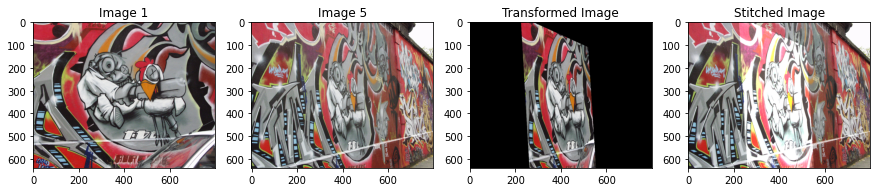

In [53]:
#Question 3 Part (b) and (c)
from random import randint
img2, img3, img4, img1, img5 = cv.imread("img2.ppm"), cv.imread("img3.ppm"), cv.imread("img4.ppm"), cv.imread("img1.ppm"), cv.imread("img5.ppm")
im1, im5, im2, im3, im4 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.cvtColor(img5, cv.COLOR_BGR2GRAY), cv.cvtColor(img2, cv.COLOR_BGR2GRAY), cv.cvtColor(img3, cv.COLOR_BGR2GRAY), cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

ims = [im1, im2, im3, im4, im5]

def random_number(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)):
        m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m):
        return l
    else:
        return random_number(n,t)

def Homography(p1, p2):
    x1, y1, x2, y2, x3, y3, x4, y4 = p2[0], p2[1], p2[2], p2[3], p2[4], p2[5], p2[6], p2[7] 
    x1T, x2T, x3T, x4T = p1[0], p1[1], p1[2], p1[3]
    zero_matrix = np.array([[0], [0], [0]])

    matrix_A = np.concatenate((np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis = 1), np.concatenate((x1T, zero_matrix.T, -x1*x1T), axis = 1),
                            np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis = 1), np.concatenate((x2T, zero_matrix.T, -x2*x2T), axis = 1),
                            np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis = 1), np.concatenate((x3T, zero_matrix.T, -x3*x3T), axis = 1),
                            np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis = 1), np.concatenate((x4T, zero_matrix.T, -x4*x4T), axis = 1)), axis = 0, dtype=np.float64)
    W, v = np.linalg.eig(((matrix_A.T)@matrix_A))
    temph= v[:,np.argmin(W)]
    H = temph.reshape((3,3))
    return H

p, s, e = 0.99, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))
Hs = []
for i in range(4):
    sift = cv.SIFT_create()
    key_points_1, descriptors_1 = sift.detectAndCompute(ims[i],None) #sifting
    key_points_2, descriptors_2 = sift.detectAndCompute(ims[i+1],None)
    bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True)  #feature matching
    matches = sorted(bf_match.match(descriptors_1, descriptors_2), key = lambda x:x.distance)

    Source_Points = [key_points_1[k.queryIdx].pt for k in matches]
    Destination_Points = [key_points_2[k.trainIdx].pt for k in matches]
    threshold, best_inliers, best_H = 2, 0, 0

    for i in range(N):
        ran_points = random_number(len(Source_Points)-1, 4)
        f_points = []
        for j in range(4):
            f_points.append(np.array([[Source_Points[ran_points[j]][0], Source_Points[ran_points[j]][1], 1]]))

        t_points = []
        for j in range(4):
            t_points.append(Destination_Points[ran_points[j]][0]) 
            t_points.append(Destination_Points[ran_points[j]][1])

        H = Homography(f_points,t_points)
        
        inliers = 0 
        for k in range(len(Source_Points)):
            X = [Source_Points[k][0], Source_Points[k][1], 1]
            HX = H @ X
            HX /= HX[-1]
            err = np.sqrt(np.power(HX[0]-Destination_Points[k][0], 2) + np.power(HX[1]-Destination_Points[k][1], 2))
            if err < threshold:
                inliers +=1
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H 
    Hs.append(best_H)

H1_H5 = Hs[3] @ Hs[2] @ Hs[1] @ Hs[0]
H1_H5 /= H1_H5[-1][-1]

print("Computed Homography = ", H1_H5)
print("Provided Homography = ", open("H1to5p",'r').read())

transformed_im = cv.warpPerspective(img1, H1_H5, (np.shape(img5)[1], np.shape(img5)[0]))
final = cv.add(img5, transformed_im)

fig, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB)), ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB)), ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(transformed_im,cv.COLOR_BGR2RGB)), ax[2].set_title("Transformed Image")
ax[3].imshow(cv.cvtColor(final,cv.COLOR_BGR2RGB)), ax[3].set_title("Stitched Image")
plt.show()

 * Due to the significant perspective difference in image 1 and image 5, the SIFT features between the two images are not sufficient to make a homography. Thus we have computed the homographies of consecutive images and then matrix multiply them to take the homography between image 1 and image 5. Both the computed and given homographies are some what similar but there is a slight difference. 